按照书上的说法，令$\hbar=1, 2m=1, a=1, V_0=10, E=-E_B(E_B>0)$，可得

$$
z_0 = \frac{a}{\hbar}\sqrt{2mV_0} = \sqrt{10}
$$

$$
z = la = \frac{a\sqrt{2m(E+V_0)}}{\hbar} = \sqrt{10-E_B}
$$

薛定谔方程的解为：

- 偶束缚态

$$
\sqrt{10-E_B} \tan \left(\sqrt{10-E_B}\right) = \sqrt{E_B} (even)
$$

- 奇束缚态

$$
\sqrt{10-E_B} \cot \left(\sqrt{10-E_B}\right) = \sqrt{E_B} (odd)
$$


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def evenBoundState(x):
    return np.sqrt(VE - x) * np.tan(np.sqrt(VE - x)) - np.sqrt(x)


def oddBoundState(x):
    return np.tan(np.sqrt(VE - x)) * np.sqrt(x) - np.sqrt(VE - x)


def bisection(f, xminus, xplus, Nmax, eps):  # x+, x-, Nmax, error
    for it in range(Nmax):
        xmid = (xplus + xminus) / 2.0  # Mid point
        if f(xplus) * f(xmid) > 0.0:  # Root in left half
            xplus = xmid  # Change x+ to x
        else:  # Root in left half
            xminus = xmid  # Change x- to x
        if abs(f(xmid)) < eps:
            # print("\n Root found with precision eps = ", eps)
            return xmid
        if it == Nmax - 1:
            # print("\n Root NOT found after Nmax iterations\n")
            return -1


def findZerosAndPlotCurves(f, ve: float, n: int) -> list:
    X = np.linspace(0, ve, n)
    Y = f(X)
    plt.plot(X, Y)

    xZeros = []

    for i in range(0, n - 1):
        if f(X[i]) * f(X[i + 1]) > 0:
            continue
        else:
            theZero = bisection(f, X[i], X[i + 1], imax, eps)
            if theZero != -1:
                xZeros.append(theZero)

    return xZeros

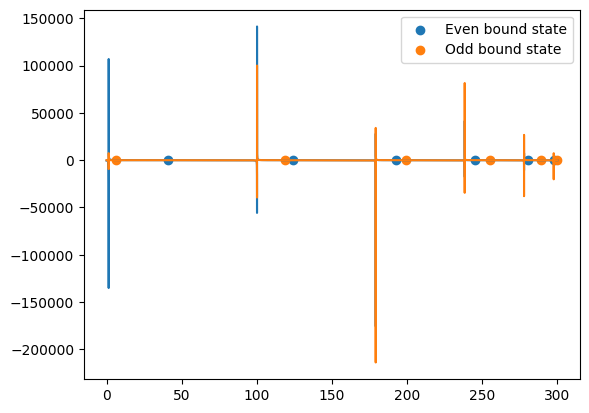

In [ ]:
# set parameters
VE = 300  # Energy
N = 100 * VE
eps = 1e-6  # Precision of zero
imax = 100  # Max iterations


# find zeros and plot curves
fig = plt.figure()
evenStateZeros = findZerosAndPlotCurves(evenBoundState, VE, N)
oddStateZeros = findZerosAndPlotCurves(oddBoundState, VE, N)

plt.scatter(evenStateZeros, np.zeros(len(evenStateZeros)), label="Even bound state")
plt.scatter(oddStateZeros, np.zeros(len(oddStateZeros)), label="Odd bound state")
plt.legend(loc="best")
plt.show()

# print("VE = ", VE)
# print("Find ", len(evenStateZeros), " Even bound state zero(s): ", evenStateZeros)
# print("Find ", len(oddStateZeros), " Odd bound state zero(s): ", oddStateZeros)